In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes
import matplotlib.image as mpimg

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-06-21 18:09:27,888 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-21 18:09:27,890 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-06-21 18:09:27,890 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-21 18:09:27,891 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-06-21 18:09:27,891 Parameters: cosmological_simulation   = 0.0


In [30]:
def plot(xx,yy,zz,x,y,z,rx,ry,rz,dx_,dy_,dz_, num, y_arr=False, xmar=False):
    x_bin = 10**np.linspace(np.log10(np.max(xx))-5,np.log10(np.max(xx)),30)
    y_bin = 10**np.linspace(np.log10(np.max(yy))-5,np.log10(np.max(yy)),30)
    
    get_cmap("cet_CET_R3")
    get_cmap("cet_CET_D1A")
    
    p = np.array(ds.all_data()[('gas', 'temperature')])
    a = p.reshape(512, 256, 256)
    ax_x = np.arange(513)*(20/512)-10
    ax_y = np.arange(257)*(20/512)-5
    ax_z = np.arange(257)*(20/512)-5
    
   
    fig = plt.figure(figsize=(16,12))
    fig.suptitle('Ray '+ num, fontsize=17)
    
    p1 = fig.add_subplot(2,2,1)
    p1.set_facecolor('black')
    plt.pcolormesh(ax_y, ax_z, a[x,:,:].T, cmap = "cet_CET_D1A", norm=colors.LogNorm())
    plt.xlabel('y (kpc)', fontsize = 15)
    plt.ylabel('z (kpc)', fontsize = 15)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    cb = plt.colorbar(pad=0.01) 
    cb.set_label(label='Temperature [K]', size=15)
    cb.ax.tick_params(labelsize='large')
    plt.clim(vmin=3*10**3, vmax=3*10**6)
    if xmar==True:
        plt.plot(ry,rz,marker='*', color='gainsboro',  markersize=10)
    else:
        plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color='gainsboro',head_width=0.14, lw=1.15)
    
    p2 = fig.add_subplot(2,2,2)
    p2.set_facecolor('black')
    plt.pcolormesh(ax_x, ax_z, a[:,y,:].T, cmap = "cet_CET_D1A", norm=colors.LogNorm())
    plt.xlabel('x (kpc)', fontsize = 15)
    plt.ylabel('z (kpc)', fontsize = 15)
    plt.xlim(-10,10)
    plt.ylim(-5,5)
    cb2 = plt.colorbar(pad=0.01) 
    cb2.set_label(label='Temperature [K]', size=15)
    cb2.ax.tick_params(labelsize='large')
    plt.clim(vmin=3*10**3, vmax=3*10**6)
    if y_arr==True:
        plt.arrow(rx,rz,dx_,dz_,length_includes_head=True,color='gainsboro',head_width=0.14, lw=1.15)
    else:
        plt.plot(rx,rz,marker='*', color='gainsboro',  markersize=10)
        
    
    p3 = fig.add_subplot(2,2,3)
    p1.set_facecolor('black')
    plt.pcolormesh(ax_x, ax_y, a[:,:,z].T, cmap = "cet_CET_D1A", norm=colors.LogNorm())
    plt.xlabel('x (kpc)', fontsize = 15)
    plt.ylabel('y (kpc)', fontsize = 15)
    plt.xlim(-10,10)
    plt.ylim(-5,5)
    cb3 = plt.colorbar(pad=0.01) 
    cb3.set_label(label='Temperature [K]', size=15)
    cb3.ax.tick_params(labelsize='large')
    plt.clim(vmin=3*10**3, vmax=3*10**6)
    plt.arrow(rx,ry,dx_,dy_,length_includes_head=True,color='gainsboro',head_width=0.14, lw=1.15)

    
    p4 = fig.add_subplot(2,2,4)
    p4.set_facecolor('black')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10**-30, 10**-25)
    plt.xlabel('Density $(g /cm^3)$', fontsize=14)
    plt.ylabel('Temperature [K]', fontsize=14)
#     plt.title('All Gas (Unweighted)', fontsize=18)
    plt.xticks(fontsize='large')
    plt.yticks(fontsize='large')

    hist4,xedges,yedges = np.histogram2d(xx,yy,bins=[x_bin,y_bin],normed=False, weights=zz)
    plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

    cb4 = plt.colorbar(pad=0.01)
    cb4.set_label(label='Cell Mass [M$_\odot$]', size=14)
    cb4.ax.tick_params(labelsize='large')
    cb4.ax.tick_params(labelsize='large')
    plt.clim(vmin=5*10**1, vmax=10**6)



    plt.tight_layout(pad=1)

In [14]:
def make_ray(x0, y0, z0, x, y, z, file):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= file,
                                 lines='all',
                                 ftype='gas')
    return ray

In [25]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 'ray1.h5')
ray2 = make_ray(1.2524, 0.33, 0, 1.2524, 0.48, 1, 'ray2.h5')
ray3 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 'ray3.h5')
ray4 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 'ray4.h5')
ray5 = make_ray(0,0.11,0, 2, 0.96, 0.8, 'ray5.h5')
ray6 = make_ray(2,0.4,0.482, 0, 0.4, 0.482, 'ray6.h5')
ray7 = make_ray(0,0.4,0.482, 2, 0.4, 0.482, 'ray7.h5')

yt : [INFO     ] 2022-06-21 18:45:14,847 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-06-21 18:45:14,849 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-06-21 18:45:15,510 Saving field data to yt dataset: ray1.h5.
yt : [INFO     ] 2022-06-21 18:45:15,583 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-06-21 18:45:15,584 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-06-21 18:45:15,584 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-06-21 18:45:15,584 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-06-21 18:45:15,585 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-06-21 18:45:15,593 Getting segment at z = 0.0: [0.6262 0.165  0.    ] unitary to [0.6262 0.24   0.5   ] unitary.
yt : [INFO  

In [26]:
M= 1.9884099E30 

den = np.array(ray1.all_data()[('gas','density')])
temp = np.array(ray1.all_data()[('gas','temperature')])
cell_mass = np.array(ray1.all_data()[('gas','cell_mass')])/M

den2 = np.array(ray2.all_data()[('gas','density')])
temp2 = np.array(ray2.all_data()[('gas','temperature')])
cell_mass2 = np.array(ray2.all_data()[('gas','cell_mass')])/M

den3 = np.array(ray3.all_data()[('gas','density')])
temp3 = np.array(ray3.all_data()[('gas','temperature')])
cell_mass3 = np.array(ray3.all_data()[('gas','cell_mass')])/M

den4 = np.array(ray4.all_data()[('gas','density')])
temp4 = np.array(ray4.all_data()[('gas','temperature')])
cell_mass4 = np.array(ray4.all_data()[('gas','cell_mass')])/M

den5 = np.array(ray5.all_data()[('gas','density')])
temp5 = np.array(ray5.all_data()[('gas','temperature')])
cell_mass5 = np.array(ray5.all_data()[('gas','cell_mass')])/M

den6 = np.array(ray6.all_data()[('gas','density')])
temp6 = np.array(ray6.all_data()[('gas','temperature')])
cell_mass6 = np.array(ray6.all_data()[('gas','cell_mass')])/M

den7 = np.array(ray7.all_data()[('gas','density')])
temp7 = np.array(ray7.all_data()[('gas','temperature')])
cell_mass7 = np.array(ray7.all_data()[('gas','cell_mass')])/M

yt : [INFO     ] 2022-06-21 18:45:50,579 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-21 18:45:50,584 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-21 18:45:50,687 Allocating for 2.940e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-21 18:45:50,691 Identified 2.330e+02 octs
yt : [INFO     ] 2022-06-21 18:45:50,795 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-21 18:45:50,799 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-21 18:45:50,901 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-21 18:45:50,904 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-21 18:45:51,011 Allocating for 9.330e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-21 18:45:51,015 Identified 5.530e+02 octs
yt : [INFO     ] 2022-06-21 18:45:51,123 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-21 18:45:51,126 

<ipython-input-30-8e2d2c7f5a9b>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


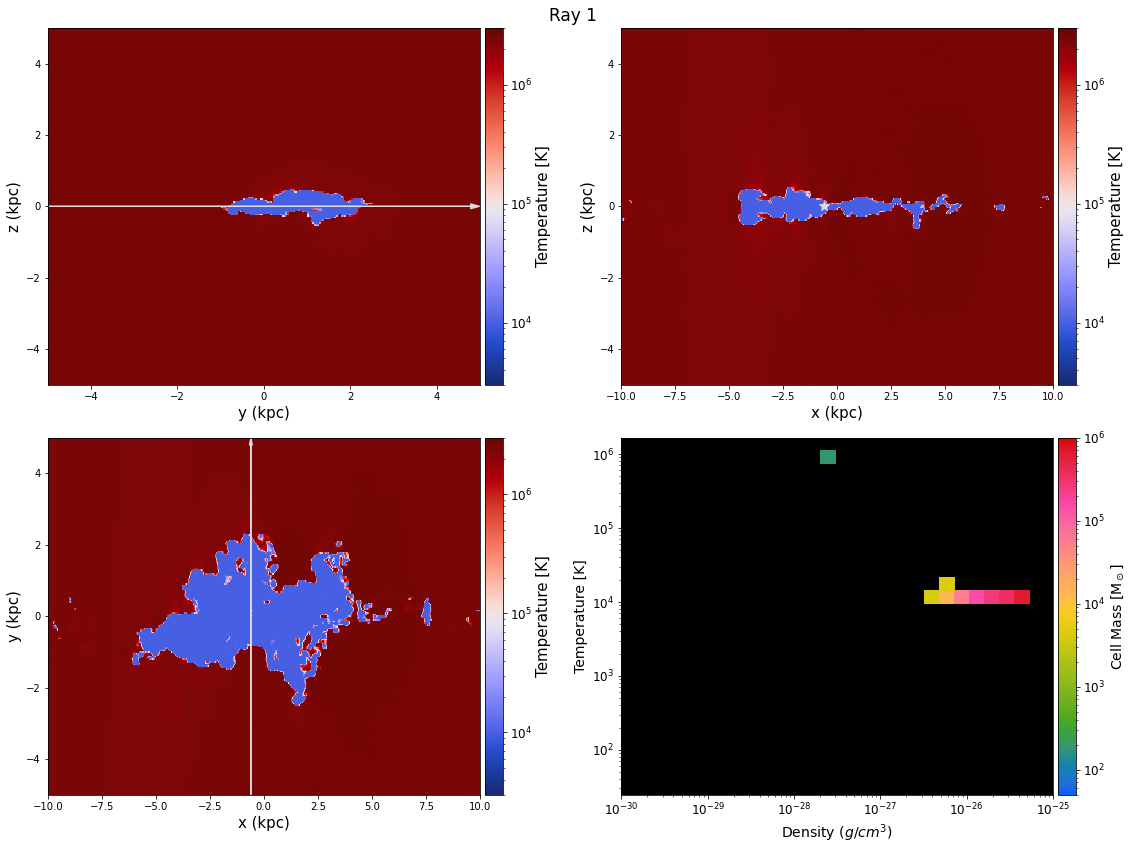

In [32]:
plot(xx=den,yy=temp,zz=cell_mass,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, num='1', y_arr=False)

<ipython-input-30-8e2d2c7f5a9b>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


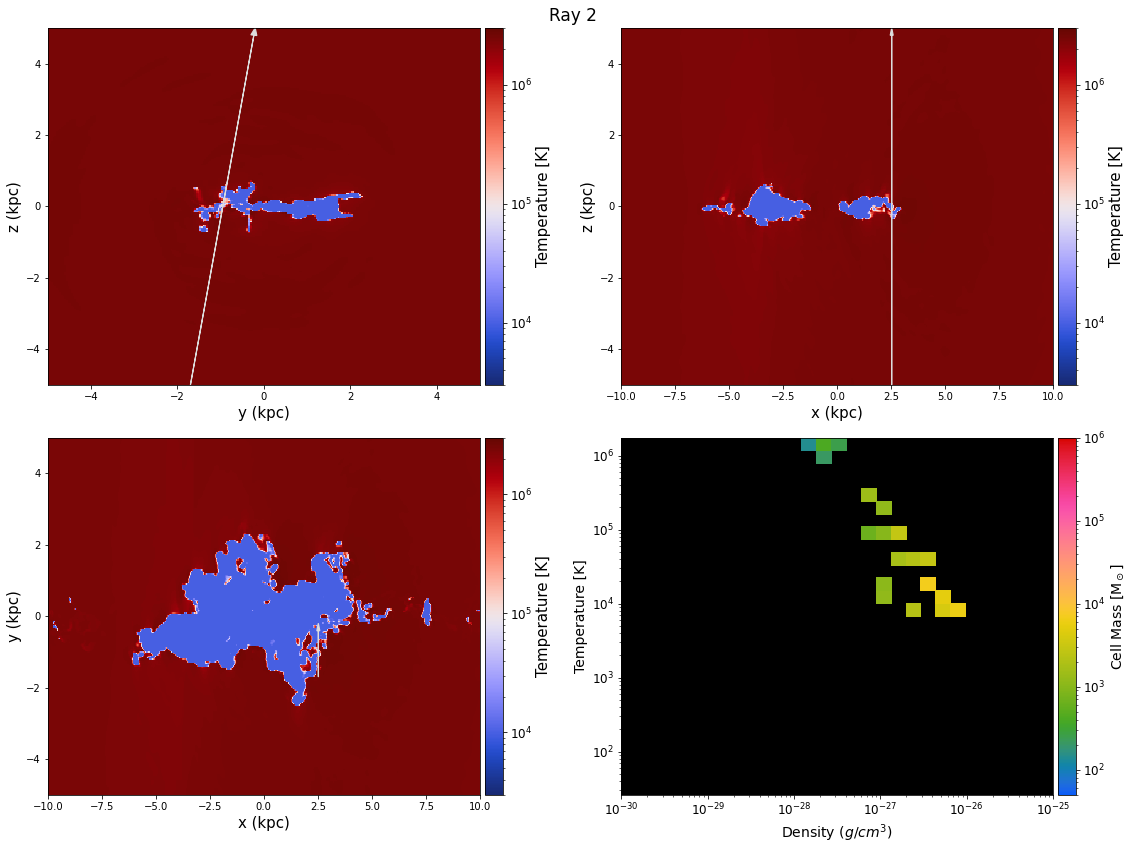

In [33]:
plot(xx=den2,yy=temp2,zz=cell_mass2,x=320,y=100,z=128,
     rx=2.524,ry=-1.7,rz=-5,dx_=0,dy_=1.5,dz_=10, num='2', y_arr=True)

<ipython-input-30-8e2d2c7f5a9b>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


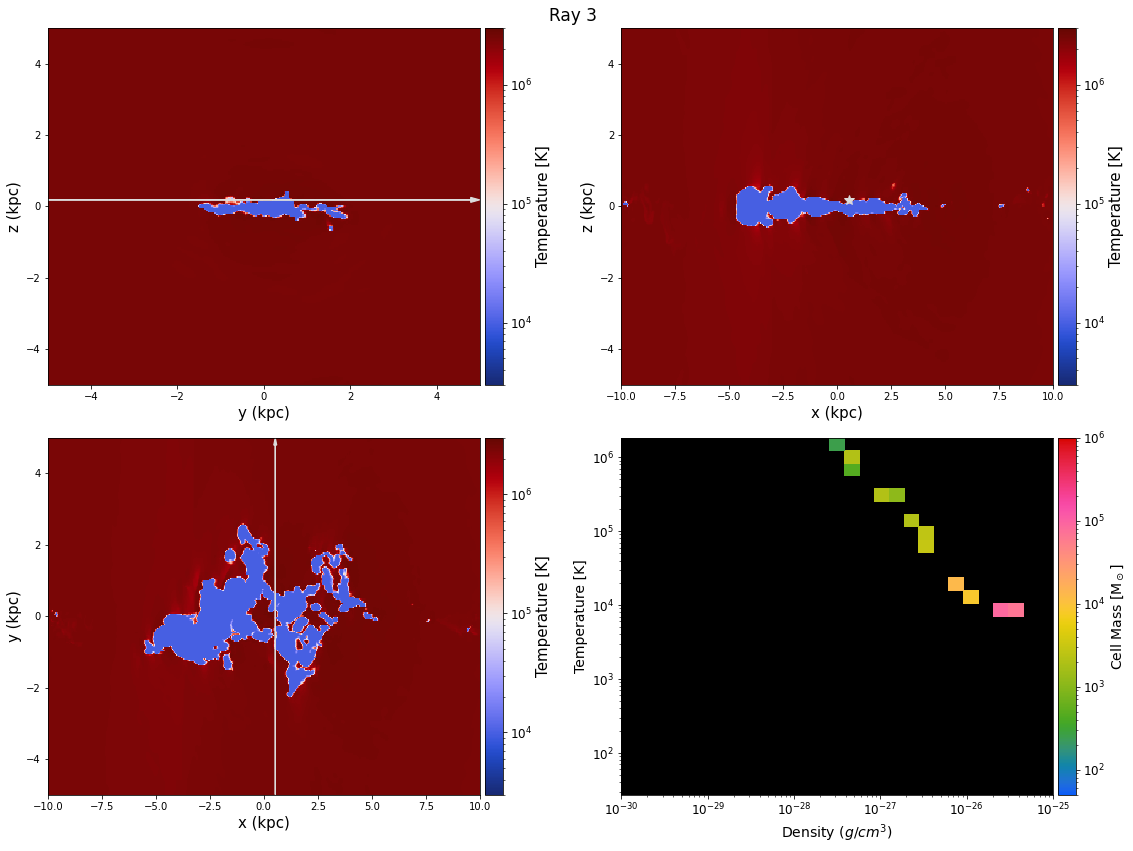

In [34]:
plot(xx=den3,yy=temp3,zz=cell_mass3,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, num='3')

<ipython-input-30-8e2d2c7f5a9b>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


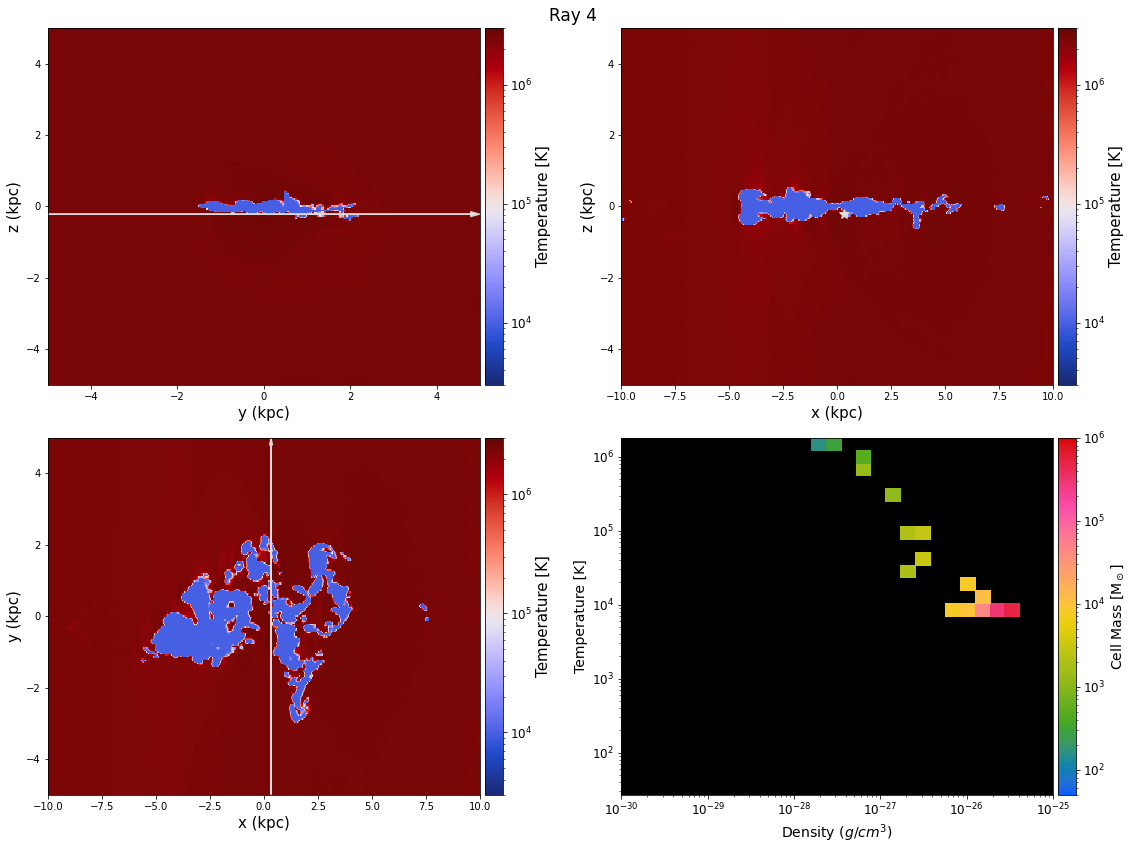

In [35]:
plot(xx=den4,yy=temp4,zz=cell_mass4,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, num='4')

<ipython-input-30-8e2d2c7f5a9b>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


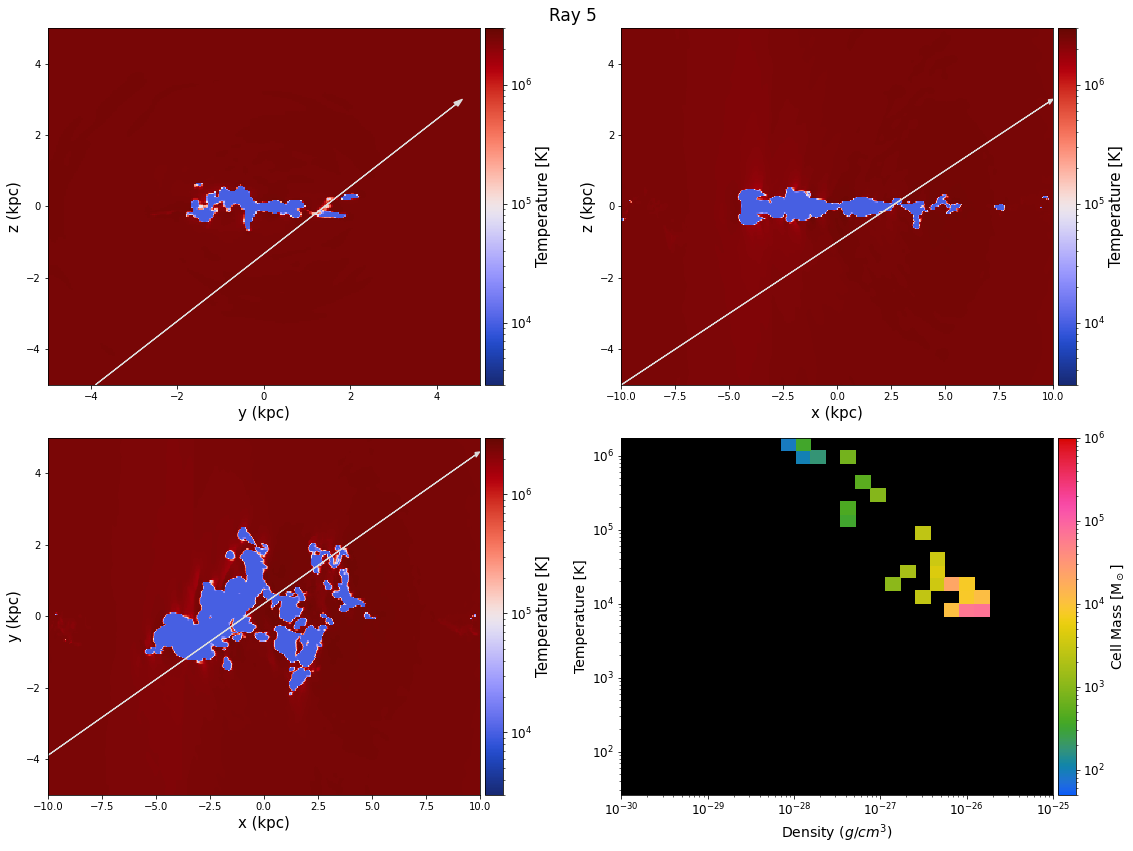

In [36]:
plot(xx=den5,yy=temp5,zz=cell_mass5,x=312,y=128,z=133,
     rx=-10,ry=-3.9,rz=-5,dx_=20,dy_=8.5,dz_=8, num='5', y_arr=True)

<ipython-input-30-8e2d2c7f5a9b>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


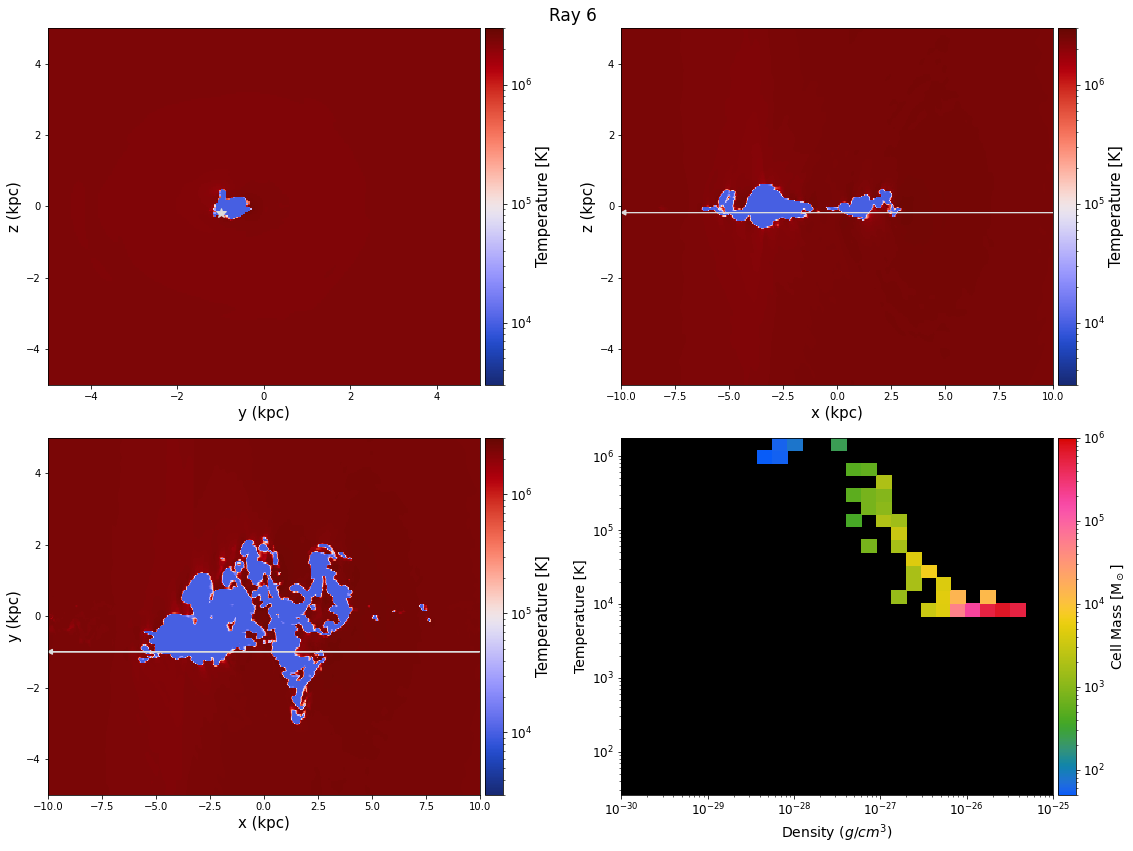

In [37]:
plot(xx=den6,yy=temp6,zz=cell_mass6,x=128,y=102,z=123,
     rx=10,ry=-1,rz=-0.176,dx_=-20,dy_=0,dz_=0, num='6', y_arr=True, xmar=True)

<ipython-input-30-8e2d2c7f5a9b>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


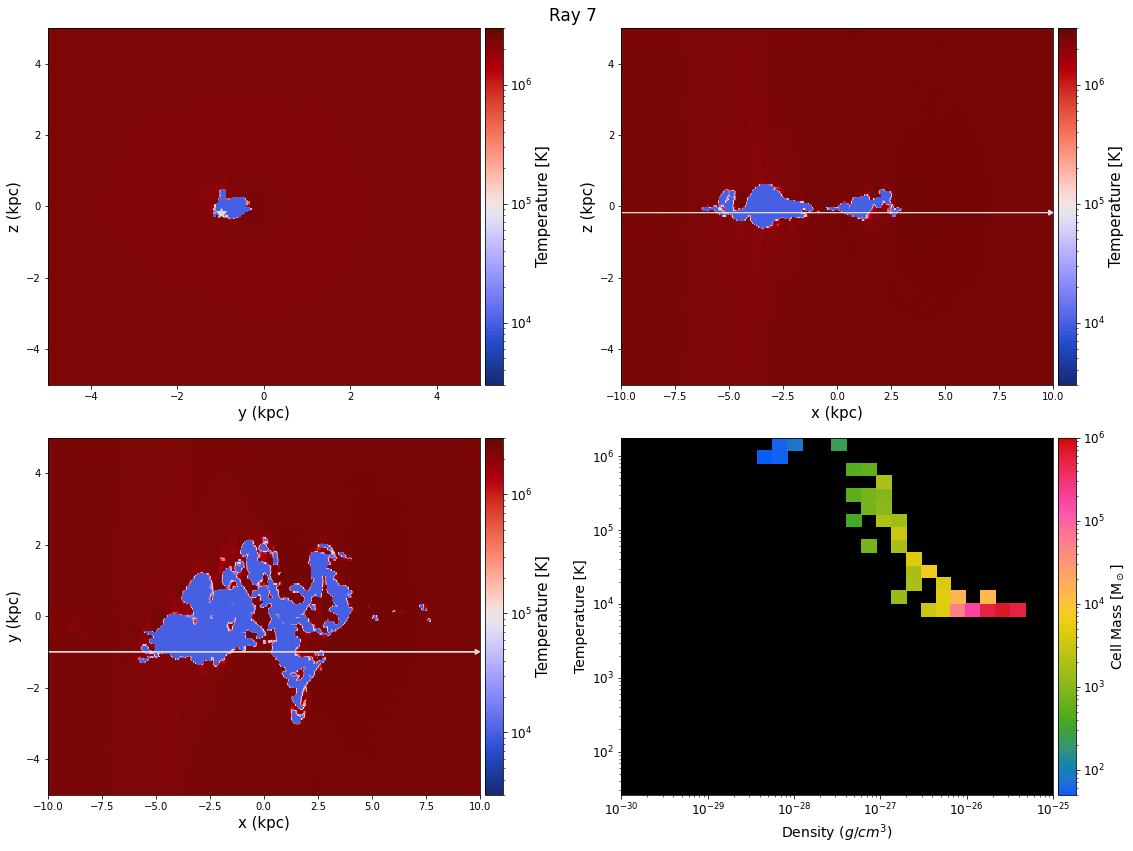

In [38]:
plot(xx=den7,yy=temp7,zz=cell_mass7,x=128,y=102,z=123,
     rx=-10,ry=-1,rz=-0.176,dx_=20,dy_=0,dz_=0, num='7', y_arr=True, xmar=True)